# Linear Regression
* Best for simple relationships
* Uses:
    * Relationship analysis
    * Predicting **continuous outcome**
    * **Forecasting**
    * Risk Assessment

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
penguins = sns.load_dataset("penguins")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
penguins_sub = penguins[penguins["species"] != 'Chinstrap']
penguins_final = penguins_sub.dropna()
penguins_final.reset_index(inplace=True, drop=True)

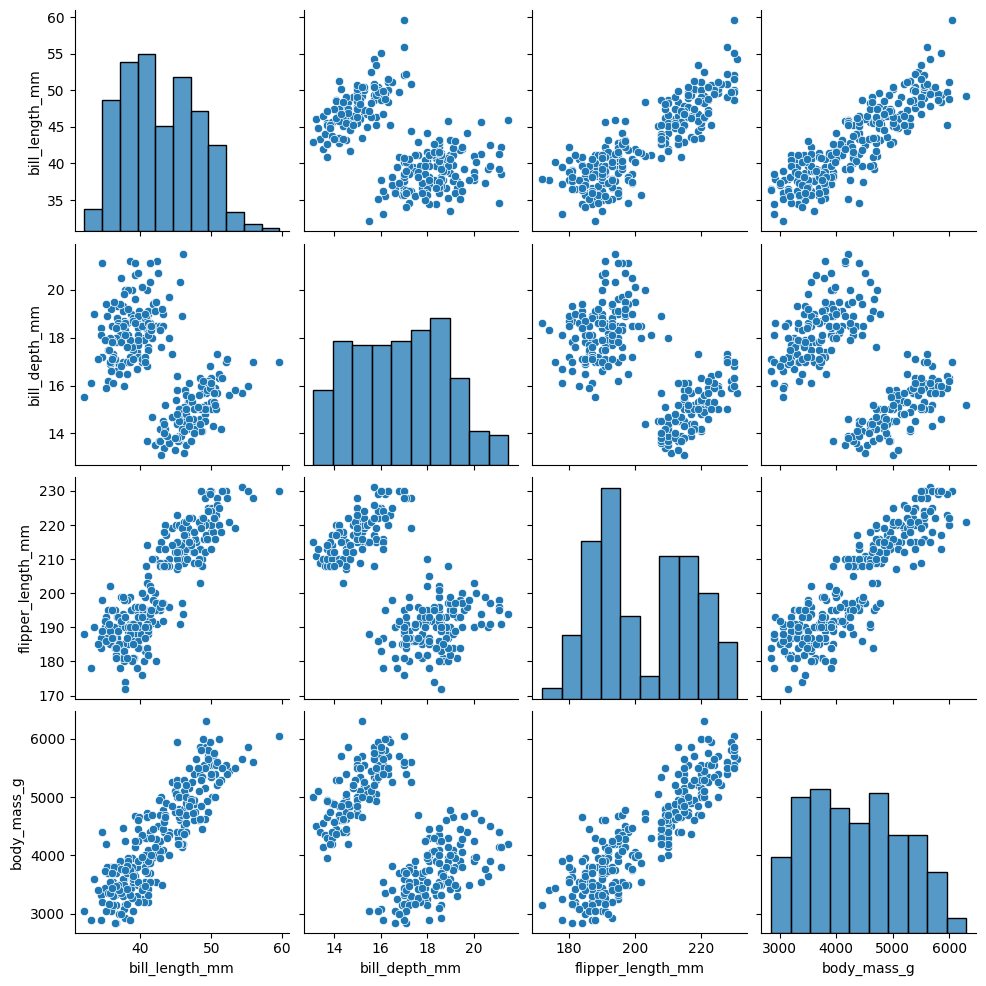

In [4]:
sns.pairplot(penguins_final)

In [5]:
ols_data = penguins_final[['bill_length_mm', "body_mass_g"]]

In [6]:
ols_formula = "body_mass_g ~ bill_length_mm"

In [7]:
from statsmodels.formula.api import ols

In [8]:
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [9]:
model.summary()
#Body mass(g) = -1707.30 + 141.19 * bill length (mm)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           1.33e-85
Time:                        21:33:23   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Subset X variable
X = ols_data["bill_length_mm"]

# Get predictions from model
fitted_values = model.predict(X)

In [11]:
# Calculate residuals
residuals = model.resid

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

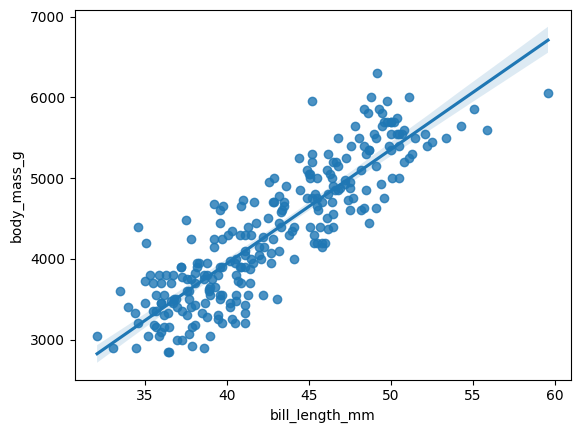

In [12]:
sns.regplot(x = "bill_length_mm", y= "body_mass_g", data = ols_data)

# Homoscedasticity
* **Homogeneity of variance**
    *  when the spread of the residuals remains consistent across the range of the independent variable
* Accounts for the **reliability of a linear regression model**
* To **check for homoscedasticity**
    * plot the residuals against the predicted values of the dependant variable
    * Look for a **random pattern**
* When **heteroscedasticity** is present
    * It can lead to **inefficient estimates of coefficients**
* How to **address heteroscedasticity**
    * **Transformations**
        * Logarithmic
        * Square root 
        * Box-Cox
    * Weighted Least Squares (WLS)
    * Adding missing variables
    * Using Robust standard errors
    * Generalized Least Squares (GLS)
    * Including Polynomial Terms

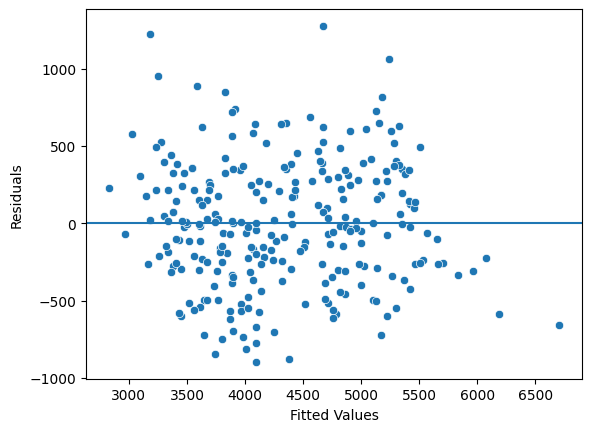

In [13]:
# Homoscedasticity
import matplotlib.pyplot as plt

fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

# Normality
* Assumption taht **errors are normally distributed**
* Ensures that:
    * various **tests about the coefficients** (such as t-tests) are valid
    * predicted **confidence intervals** and **prediction intervals** are valid
* To **check for Normality**
    * Histogram
    * **Q-Q** (Quantile-Quantile) **Plot**
    * Statistical Tests
        * Shapiro-Wilk test
        * Anderson-Darling test
        * Kolmogorov-Smirnov test
* How to **address violations of normality**
    * Transformations
        * Logarithmic
        * Square root
        * Box-Cox
    * Adding missing variables
    * Use different model specifications
    * Non-paramatic Approaches

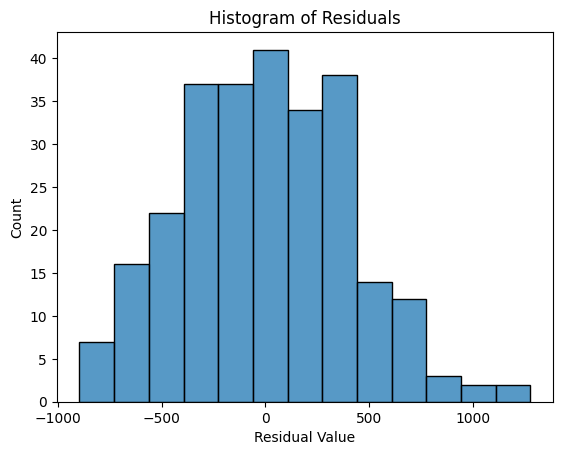

In [14]:
# Normality
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

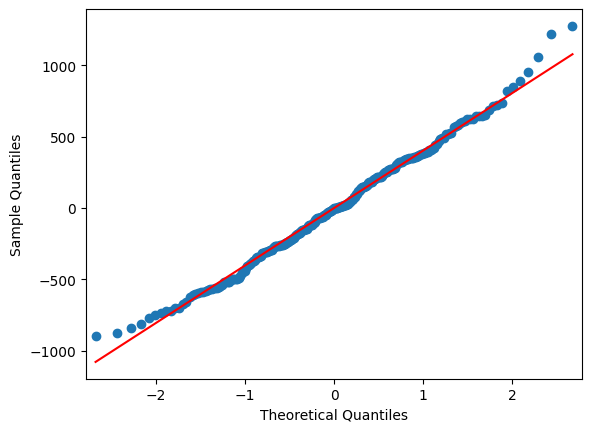

In [15]:
# QQ Plot
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()